In [57]:
%matplotlib inline
import math
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import display


In [ ]:
#%pip install matplotlib-venn

In [58]:
DATA_DIR = r"Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data"

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}
name = "microbiology_events_codes_3"

In [6]:
df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name]}", index_col=False)

df.columns

Index(['subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_type_desc',
       'test_name', 'org_name', 'ab_name', 'dilution_text',
       'dilution_comparison', 'dilution_value', 'interpretation',
       'technician_id', 'qc_flag'],
      dtype='object')

# INspections

## A

In [7]:
df.head(10)

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
0,10000980,26913865.0,2189-06-27 00:00:00,2189-06-27 10:52:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_063,QC_OK
1,10002155,23822395.0,2129-08-04 00:00:00,2129-08-04 17:04:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
2,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 15:54:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,NaN,NaN,TECH_083,QC_OK
3,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,GRAM STAIN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_095,QC_OK
4,10002155,23822395.0,2129-08-05 00:00:00,2129-08-05 18:43:00,SPUTUM,RESPIRATORY CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_077,QC_OK
5,10002155,23822395.0,2129-08-07 00:00:00,2129-08-07 12:07:00,SPUTUM,ACID FAST SMEAR,NaN,NaN,NaN,NaN,NaN,NaN,TECH_068,QC_WARN
6,10002155,23822395.0,2129-08-07 00:00:00,2129-08-07 12:07:00,SPUTUM,ACID FAST CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_084,QC_OK
7,10002155,23822395.0,2129-08-08 00:00:00,2129-08-08 12:22:00,STOOL,CLOSTRIDIUM DIFFICILE TOXIN A & B TEST,NaN,NaN,NaN,NaN,NaN,NaN,TECH_013,QC_OK
8,10002155,23822395.0,2129-08-09 00:00:00,2129-08-09 20:03:00,SPUTUM,GRAM STAIN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_033,QC_OK
9,10002155,23822395.0,2129-08-09 00:00:00,2129-08-09 20:03:00,SPUTUM,RESPIRATORY CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_023,QC_WARN


In [9]:
df.tail(10)

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag
15577,19997660,20374585.0,2175-10-12 00:00:00,2175-10-12 05:45:00,BLOOD CULTURE,Aerobic Bottle Gram Stain,NaN,NaN,NaN,NaN,NaN,NaN,TECH_102,QC_OK
15578,19997661,25968240.0,2172-03-15 00:00:00,2172-03-15 15:30:00,"FLUID,OTHER",FUNGAL CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_029,QC_OK
15579,19997662,29338106.0,2182-08-22 00:00:00,2182-08-22 09:09:00,URINE,Legionella Urinary Antigen,NaN,NaN,NaN,NaN,NaN,NaN,TECH_082,QC_OK
15580,19997663,20511836.0,2158-06-06 00:00:00,2158-06-06 19:30:00,URINE,URINE CULTURE,ESCHERICHIA COLI,GENTAMICIN,<=1,<=,1.0,S,TECH_114,QC_OK
15581,19997664,25289714.0,2186-01-02 00:00:00,2186-01-02 03:40:00,MRSA SCREEN,MRSA SCREEN,NaN,NaN,NaN,NaN,NaN,NaN,TECH_049,QC_OK
15582,19997665,26052266.0,2173-11-09 00:00:00,2173-11-09 18:09:00,Staph aureus swab,Staph aureus Screen,NaN,NaN,NaN,NaN,NaN,NaN,TECH_051,QC_OK
15583,19997666,24256422.0,2168-08-03 00:00:00,2168-08-03 22:00:00,BLOOD CULTURE,"Blood Culture, Routine",NaN,NaN,NaN,NaN,NaN,NaN,TECH_086,QC_OK
15584,19997667,20372003.0,2144-09-21 00:00:00,2144-09-21 20:14:00,URINE,URINE CULTURE,PSEUDOMONAS AERUGINOSA,MEROPENEM,8,=,8.0,I,TECH_115,QC_FAIL
15585,19997668,20329436.0,2129-08-12 00:00:00,2129-08-12 15:56:00,CATHETER TIP-IV,WOUND CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,TECH_061,QC_OK
15586,19997669,28219199.0,2160-07-03 00:00:00,2160-07-03 15:39:00,URINE,URINE CULTURE,KLEBSIELLA PNEUMONIAE,TRIMETHOPRIM/SULFA,<=1,<=,1.0,S,TECH_083,QC_WARN


## B

In [24]:
df["qc_flag"].value_counts(dropna=False) 

qc_flag
QC_OK      13235
QC_WARN     1572
QC_FAIL      779
Name: count, dtype: int64

S = Sensitive / Susceptible
The organism is inhibited by standard drug levels → drug is expected to work.

R = Resistant
The organism is not inhibited even at high drug concentrations → drug will not work.

I = Intermediate (older meaning) / I = Increased exposure (new CLSI meaning)

Historically: Result is uncertain; success depends on achieving high drug levels.

Modern definitions: Drug can work if exposure is increased (higher dose, longer infusion, high concentrations at infection site).

In [22]:
df["interpretation"].value_counts(dropna=False) 

interpretation
NaN    10766
S       3807
R        856
I        157
Name: count, dtype: int64

In [23]:
df["dilution_comparison"].value_counts(dropna=False) 

dilution_comparison
NaN           10875
<=             3233
=               782
=>              696
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15587 entries, 0 to 15586
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           15587 non-null  int64  
 1   hadm_id              15587 non-null  float64
 2   chartdate            15587 non-null  object 
 3   charttime            15587 non-null  object 
 4   spec_type_desc       15587 non-null  object 
 5   test_name            15587 non-null  object 
 6   org_name             5391 non-null   object 
 7   ab_name              4820 non-null   object 
 8   dilution_text        4713 non-null   object 
 9   dilution_comparison  4711 non-null   object 
 10  dilution_value       4711 non-null   float64
 11  interpretation       4820 non-null   object 
 12  technician_id        15587 non-null  object 
 13  qc_flag              15587 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.7+ MB


==> spec_type_desc == fluid from df2?

# Data Understanding and Preprocessing, cleaning of DF1 - heart

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
#show duplicated rows
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag,is_qc_fail,is_qc_warn,is_qc_ok


In [67]:
df = df.drop_duplicates()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           15586 non-null  int64  
 1   hadm_id              15586 non-null  int64  
 2   chartdate            15586 non-null  object 
 3   charttime            15586 non-null  object 
 4   spec_type_desc       15586 non-null  object 
 5   test_name            15586 non-null  object 
 6   org_name             5391 non-null   object 
 7   ab_name              4820 non-null   object 
 8   dilution_text        4458 non-null   object 
 9   dilution_comparison  4458 non-null   object 
 10  dilution_value       4458 non-null   float64
 11  interpretation       4820 non-null   object 
 12  technician_id        15586 non-null  object 
 13  qc_flag              15586 non-null  object 
 14  is_qc_fail           15586 non-null  int64  
 15  is_qc_warn           15586 non-null 

In [19]:
for col in df.columns:
    if col == 'charttime' or col == 'hadm_id' or col == 'subject_id' or col == 'chartdate':
        continue
    print(f"{col}: {df[col].value_counts().tail(30)}")

spec_type_desc: spec_type_desc
CATHETER TIP-IV                                             113
Blood (EBV)                                                 112
BRONCHOALVEOLAR LAVAGE                                      107
Rapid Respiratory Viral Screen & Culture                    102
Influenza A/B by DFA                                         86
Blood (CMV AB)                                               86
BLOOD CULTURE ( MYCO/F LYTIC BOTTLE)                         53
Mini-BAL                                                     49
IMMUNOLOGY                                                   46
BRONCHIAL WASHINGS                                           39
PERITONEAL FLUID                                             36
ABSCESS                                                      34
DIALYSIS FLUID                                               34
JOINT FLUID                                                  31
Immunology (CMV)                                             27
Blood (To

No wrong nans found

## Check for wrong NaNs / non typical entries in each column

#### Find wrong NaNs

- valueuom: has '' , remove; Pos/Neg == +/-; U ??
- value has wrong entries inspect and extrat if possible to valuenum


### Handle Value wrong nans, then extract missing from value into new column valuenum_merged if possible

In [ ]:
# # chec k only value column: show all unique non-numerical entries in 'value' column
# non_numerical_values = []
# for idx, value in df['value'].items():
#     if pd.isna(value):  # Skip NaN/None
#         continue
    
#     # Try to convert to float
#     try:
#         float(value)
#     except (ValueError, TypeError):
#         non_numerical_values.append({
#             'index': idx,
#             'value': value,
#             'type': type(value).__name__
#         })
# print(f"\n{'─'*80}")
# print(f"Column: 'value' | Non-numerical entries: {len(non_numerical_values)}")
# print(f"{'─'*80}")
# # Get unique non-numerical values
# unique_values = list(set([e['value'] for e in non_numerical_values]))
# print(f"Unique non-numerical values ({len(unique_values)}):")
# for val in sorted(unique_values):
#     count = sum(1 for e in non_numerical_values if e['value'] == val)
#     print(f"  • '{val}' — appears {count} times")   
    

FINDINGS

=> in col value, We want to convert '___' and 'NONE' 'ERROR' to np.nan!

=> then we create a new col value_extracted (float64) out of col value where:
- we can calculate as float complete / like 20/0 but only if there is anumber before and after the /! => complete
- we can take the middle point of complete ranges like '80-160'
- we can calculate a float value of comparisons with < > by sub/add 0.1 to the number, eg. '>1.050' => 1.150 or '<1' => 0.9
- the rest is to nuemic error coerce put to NaN.

=> then, we fill np.nan entries in col valuenum with values from valUe_extracted if they are not nan and tell me the amount of filled rows and show examples beffore and after

 ## Convert datetimes

In [69]:
cols = ['charttime', 'chartdate']  

for col in cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: parsed {df[col].notna().sum()} values, {df[col].isna().sum()} NaT")

display(df[[c for c in df.columns if c in cols]])

charttime: parsed 15586 values, 0 NaT
chartdate: parsed 15586 values, 0 NaT


,chartdate,charttime
0,2189-06-27,2189-06-27 10:52:00
1,2129-08-04,2129-08-04 17:04:00
2,2129-08-05,2129-08-05 15:54:00
3,2129-08-05,2129-08-05 18:43:00
4,2129-08-05,2129-08-05 18:43:00
...,...,...
15581,2173-11-09,2173-11-09 18:09:00
15582,2168-08-03,2168-08-03 22:00:00
15583,2144-09-21,2144-09-21 20:14:00
15584,2129-08-12,2129-08-12 15:56:00


## inspect qc_flag == FAIL

In [70]:
# check qc_flag == 'FAIL' 
df["qc_flag"].value_counts()

qc_flag
QC_OK      13235
QC_WARN     1572
QC_FAIL      779
Name: count, dtype: int64

inspect fail dataset

In [34]:
df_test = df[df["qc_flag"] == 'QC_FAIL'].copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 42 to 15584
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subject_id           779 non-null    int64         
 1   hadm_id              779 non-null    float64       
 2   chartdate            779 non-null    datetime64[ns]
 3   charttime            779 non-null    datetime64[ns]
 4   spec_type_desc       779 non-null    object        
 5   test_name            779 non-null    object        
 6   org_name             290 non-null    object        
 7   ab_name              259 non-null    object        
 8   dilution_text        255 non-null    object        
 9   dilution_comparison  255 non-null    object        
 10  dilution_value       255 non-null    float64       
 11  interpretation       259 non-null    object        
 12  technician_id        779 non-null    object        
 13  qc_flag              779 non-null    

2% fail, 8% warn.

IDEA: small percentage => set valuenum_merged to np.nan those rows bc qualtiy control failed

In [71]:
# Handle QC flags
qc_fail_mask = df['qc_flag'] == 'QC_FAIL'
qc_warn_mask = df['qc_flag'] == 'QC_WARN'

# Drop failed measurements from dilution_value       
before_non_null = df['dilution_value'].notna().sum()
df.loc[qc_fail_mask, 'dilution_value'] = np.nan
df.loc[qc_fail_mask, 'dilution_comparison'] = np.nan
df.loc[qc_fail_mask, 'dilution_text'] = np.nan
after_non_null = df['dilution_value'].notna().sum()

print(f"set {before_non_null - after_non_null:,} FAIL measurements from dilution_value to nan.")
print(f"Coverage drop: {(before_non_null - after_non_null) / len(df) * 100:.2f}%")

# Binary QC features for downstream aggregation/clustering
df['is_qc_fail'] = qc_fail_mask.astype(int)
df['is_qc_warn'] = qc_warn_mask.astype(int)
df['is_qc_ok'] = (~qc_fail_mask & ~qc_warn_mask).astype(int)

print(df[['qc_flag', 'is_qc_ok', 'is_qc_warn', 'is_qc_fail']].head())

set 0 FAIL measurements from dilution_value to nan.
Coverage drop: 0.00%
  qc_flag  is_qc_ok  is_qc_warn  is_qc_fail
0   QC_OK         1           0           0
1   QC_OK         1           0           0
2   QC_OK         1           0           0
3   QC_OK         1           0           0
4   QC_OK         1           0           0


## Check if dilution_text matches with diluation_value and dilution_comparison

In [72]:
# check if 
df_test = df[df["dilution_comparison"].isna()].copy()
df_test["dilution_text"].value_counts(dropna=False)

dilution_text
NaN    11128
Name: count, dtype: int64

In [73]:
df_test[df["dilution_text"] == ">256"]

C:\Users\dgars\AppData\Local\Temp\ipykernel_26712\2108123711.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test[df["dilution_text"] == ">256"]


,subject_id,hadm_id,chartdate,charttime,spec_type_desc,test_name,org_name,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation,technician_id,qc_flag,is_qc_fail,is_qc_warn,is_qc_ok


fix those

In [74]:
df.loc[df["dilution_text"] == ">256", "dilution_comparison"] = ">"
df.loc[df["dilution_text"] == ">256", "dilution_value"] = 256.0

#### in genreal (same findings)

In [35]:
# in general:
print("="*80)
print("CHECK: dilution_text vs dilution_value + dilution_comparison")
print("="*80)

# Extract comparison operator and value from dilution_text
def parse_dilution_text(text):
    if pd.isna(text):
        return np.nan, np.nan
    text = str(text).strip()
    
    # Match patterns like ">256", "<=0.5", "=4", etc.
    match = re.match(r'^([<>=]+)?\s*(\d+\.?\d*)$', text)
    if match:
        comp = match.group(1) if match.group(1) else '='
        val = float(match.group(2))
        return comp, val
    return np.nan, np.nan

# Parse dilution_text
parsed = df['dilution_text'].apply(parse_dilution_text)
df['_parsed_comp'] = parsed.apply(lambda x: x[0])
df['_parsed_val'] = parsed.apply(lambda x: x[1])

# Compare with existing columns
df['_comp_match'] = df['_parsed_comp'] == df['dilution_comparison']
df['_val_match'] = df['_parsed_val'] == df['dilution_value']

# Summary
has_text = df['dilution_text'].notna()
print(f"\nRows with dilution_text: {has_text.sum():,}")

comp_match = (df['_comp_match'] == True).sum()
val_match = (df['_val_match'] == True).sum()
both_match = ((df['_comp_match'] == True) & (df['_val_match'] == True)).sum()

print(f"\nComparison matches: {comp_match:,}")
print(f"Value matches: {val_match:,}")
print(f"Both match: {both_match:,}")

# Show mismatches
mismatches = df[has_text & ((df['_comp_match'] == False) | (df['_val_match'] == False))]
print(f"\nMismatches: {len(mismatches):,}")

if len(mismatches) > 0:
    print("\nSample mismatches:")
    display(mismatches[['dilution_text', '_parsed_comp', '_parsed_val', 
                        'dilution_comparison', 'dilution_value']].head(20))

# Show rows where dilution_text exists but comparison/value is NaN
missing_parsed = df[has_text & (df['dilution_comparison'].isna() | df['dilution_value'].isna())]
print(f"\nRows with dilution_text but missing comparison/value: {len(missing_parsed):,}")
if len(missing_parsed) > 0:
    print("\nSample rows to potentially fill:")
    display(missing_parsed[['dilution_text', '_parsed_comp', '_parsed_val', 
                            'dilution_comparison', 'dilution_value']].head(20))

# Cleanup
df.drop(columns=['_parsed_comp', '_parsed_val', '_comp_match', '_val_match'], inplace=True)

CHECK: dilution_text vs dilution_value + dilution_comparison

Rows with dilution_text: 4,713

Comparison matches: 0
Value matches: 4,711
Both match: 0

Mismatches: 4,713

Sample mismatches:


,dilution_text,_parsed_comp,_parsed_val,dilution_comparison,dilution_value
125,8,=,8.00,=,8.00
126,<=1,<=,1.00,<=,1.00
127,<=16,<=,16.00,<=,16.00
128,<=1,<=,1.00,<=,1.00
129,<=1,<=,1.00,<=,1.00
130,<=1,<=,1.00,<=,1.00
131,<=1,<=,1.00,<=,1.00
132,<=0.25,<=,0.25,<=,0.25
133,8,=,8.00,=,8.00
134,<=1,<=,1.00,<=,1.00



Rows with dilution_text but missing comparison/value: 2

Sample rows to potentially fill:


,dilution_text,_parsed_comp,_parsed_val,dilution_comparison,dilution_value
8607,>256,>,256.0,NaN,NaN
13478,>256,>,256.0,NaN,NaN


## Little intermed inspection 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subject_id           15586 non-null  int64         
 1   hadm_id              15586 non-null  int64         
 2   chartdate            15586 non-null  datetime64[ns]
 3   charttime            15586 non-null  datetime64[ns]
 4   spec_type_desc       15586 non-null  object        
 5   test_name            15586 non-null  object        
 6   org_name             5391 non-null   object        
 7   ab_name              4820 non-null   object        
 8   dilution_text        4458 non-null   object        
 9   dilution_comparison  4458 non-null   object        
 10  dilution_value       4458 non-null   float64       
 11  interpretation       4820 non-null   object        
 12  technician_id        15586 non-null  object        
 13  qc_flag              15586 non-

In [44]:
df['hadm_id'] = df['hadm_id'].astype('int64')

## Handle missing values

In [38]:
# print sum of all missing values per column
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'org_name': 10195 missing values
Column 'ab_name': 10766 missing values
Column 'dilution_text': 10873 missing values
Column 'dilution_comparison': 10873 missing values
Column 'dilution_value': 10873 missing values
Column 'interpretation': 10766 missing values


In [ ]:
#%pip install matplotlib-venn

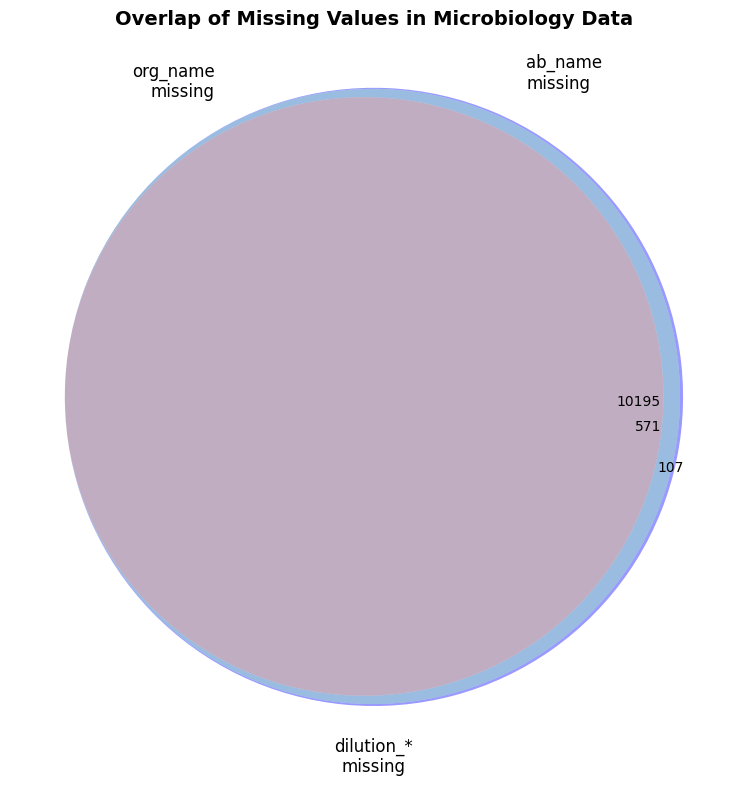

MISSING VALUES OVERLAP SUMMARY

Total rows: 15,586

Individual missing counts:
  org_name:    10,195
  ab_name:     10,766
  dilution_*:  10,873

Overlap breakdown:
  Only org_name missing:              0
  Only ab_name missing:               0
  Only dilution_* missing:            107
  org_name + ab_name:                 0
  org_name + dilution_*:              0
  ab_name + dilution_*:               571
  All three missing:                  10,195

Rows with ANY missing:              10,873
Rows with NO missing (complete):    4,713


In [41]:
# overlap of those missing vals (maybe venn diagramm actually? )
from matplotlib_venn import venn3

# Create missing value masks
missing_org = df['org_name'].isna()
missing_ab = df['ab_name'].isna()
missing_dilution = df['dilution_text'].isna()  # dilution_comparison, dilution_value have same pattern

# Calculate overlaps
only_org = (missing_org & ~missing_ab & ~missing_dilution).sum()
only_ab = (~missing_org & missing_ab & ~missing_dilution).sum()
only_dilution = (~missing_org & ~missing_ab & missing_dilution).sum()
org_ab = (missing_org & missing_ab & ~missing_dilution).sum()
org_dilution = (missing_org & ~missing_ab & missing_dilution).sum()
ab_dilution = (~missing_org & missing_ab & missing_dilution).sum()
all_three = (missing_org & missing_ab & missing_dilution).sum()

# Venn diagram
fig, ax = plt.subplots(figsize=(10, 8))
venn = venn3(
    subsets=(only_org, only_ab, org_ab, only_dilution, org_dilution, ab_dilution, all_three),
    set_labels=('org_name\nmissing', 'ab_name\nmissing', 'dilution_*\nmissing'),
    ax=ax
)
ax.set_title('Overlap of Missing Values in Microbiology Data', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('missing_values_venn.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary table
print("="*60)
print("MISSING VALUES OVERLAP SUMMARY")
print("="*60)
print(f"\nTotal rows: {len(df):,}")
print(f"\nIndividual missing counts:")
print(f"  org_name:    {missing_org.sum():,}")
print(f"  ab_name:     {missing_ab.sum():,}")
print(f"  dilution_*:  {missing_dilution.sum():,}")
print(f"\nOverlap breakdown:")
print(f"  Only org_name missing:              {only_org:,}")
print(f"  Only ab_name missing:               {only_ab:,}")
print(f"  Only dilution_* missing:            {only_dilution:,}")
print(f"  org_name + ab_name:                 {org_ab:,}")
print(f"  org_name + dilution_*:              {org_dilution:,}")
print(f"  ab_name + dilution_*:               {ab_dilution:,}")
print(f"  All three missing:                  {all_three:,}")
print(f"\nRows with ANY missing:              {(missing_org | missing_ab | missing_dilution).sum():,}")
print(f"Rows with NO missing (complete):    {(~missing_org & ~missing_ab & ~missing_dilution).sum():,}")

## Do scatterpltos / distr / etc to check for dataqualtiy

### Do correlation matrix

## Save

In [49]:
df.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}", index=False)

In [59]:
# load already cleaned to skip first steps
df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject_id           15586 non-null  int64  
 1   hadm_id              15586 non-null  int64  
 2   chartdate            15586 non-null  object 
 3   charttime            15586 non-null  object 
 4   spec_type_desc       15586 non-null  object 
 5   test_name            15586 non-null  object 
 6   org_name             5391 non-null   object 
 7   ab_name              4820 non-null   object 
 8   dilution_text        4458 non-null   object 
 9   dilution_comparison  4458 non-null   object 
 10  dilution_value       4458 non-null   float64
 11  interpretation       4820 non-null   object 
 12  technician_id        15586 non-null  object 
 13  qc_flag              15586 non-null  object 
 14  is_qc_fail           15586 non-null  int64  
 15  is_qc_warn           15586 non-null 

# Create features and slim version

In [77]:
df_slim = df.copy() 

In [79]:
df_slim.columns

Index(['subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_type_desc',
       'test_name', 'org_name', 'ab_name', 'dilution_text',
       'dilution_comparison', 'dilution_value', 'interpretation',
       'technician_id', 'qc_flag', 'is_qc_fail', 'is_qc_warn', 'is_qc_ok'],
      dtype='object')

In [78]:
df_slim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subject_id           15586 non-null  int64         
 1   hadm_id              15586 non-null  int64         
 2   chartdate            15586 non-null  datetime64[ns]
 3   charttime            15586 non-null  datetime64[ns]
 4   spec_type_desc       15586 non-null  object        
 5   test_name            15586 non-null  object        
 6   org_name             5391 non-null   object        
 7   ab_name              4820 non-null   object        
 8   dilution_text        4458 non-null   object        
 9   dilution_comparison  4458 non-null   object        
 10  dilution_value       4458 non-null   float64       
 11  interpretation       4820 non-null   object        
 12  technician_id        15586 non-null  object        
 13  qc_flag              15586 non-

## features

In [92]:
df_micro = df_slim.copy()

gb = df_micro.groupby(['subject_id', 'hadm_id'])

In [93]:
# --- Core count ---
feat_total_micro = gb.size().rename('total_microbio_events')

# --- Diversity features ---
feat_spec_types = gb['spec_type_desc'].nunique().rename('unique_specimen_types')
feat_test_names = gb['test_name'].nunique().rename('unique_test_names')
feat_orgs = gb['org_name'].nunique().rename('unique_organisms')
feat_ab = gb['ab_name'].nunique().rename('unique_antibiotics')
feat_tech = gb['technician_id'].nunique().rename('unique_technicians')

# --- Susceptibility ---
feat_susc = gb['interpretation'].apply(lambda x: (x == 'S').sum()).rename('num_susceptible')
feat_res  = gb['interpretation'].apply(lambda x: (x == 'R').sum()).rename('num_resistant')
feat_int  = gb['interpretation'].apply(lambda x: (x == 'I').sum()).rename('num_intermediate')

feat_res_ratio = (feat_res / feat_total_micro).rename('resistant_ratio')

# --- QC flags ---
feat_qc_fail = gb['is_qc_fail'].sum().rename('micro_qc_fail')
feat_qc_warn = gb['is_qc_warn'].sum().rename('micro_qc_warn')
feat_qc_ok   = gb['is_qc_ok'].sum().rename('micro_qc_ok')

# --- Temporal ---
feat_time_span = (
    (gb['charttime'].max() - gb['charttime'].min()).dt.total_seconds() / 3600
).rename('micro_time_span_hours')

# --- Merge ---
micro_features = pd.concat([
    feat_total_micro,
    feat_spec_types,
    feat_test_names,
    feat_orgs,
    feat_ab,
    feat_tech,
    feat_susc,
    feat_res,
    feat_int,
    feat_res_ratio,
    feat_qc_fail,
    feat_qc_warn,
    feat_qc_ok,
    feat_time_span
], axis=1)

# presence flag
micro_features['has_micro'] = 1

micro_features = micro_features.reset_index()

In [94]:
micro_features.head()

,subject_id,hadm_id,total_microbio_events,unique_specimen_types,unique_test_names,unique_organisms,unique_antibiotics,unique_technicians,num_susceptible,num_resistant,num_intermediate,resistant_ratio,micro_qc_fail,micro_qc_warn,micro_qc_ok,micro_time_span_hours,has_micro
0,10000980,26913865,1,1,1,0,0,1,0,0,0,0.0,0,0,1,0.000000,1
1,10002155,23822395,12,4,7,0,0,11,0,0,0,0.0,0,2,10,215.966667,1
2,10007058,22954658,2,2,2,0,0,2,0,0,0,0.0,0,0,2,28.650000,1
3,10013569,22891949,1,1,1,0,0,1,0,0,0,0.0,0,0,1,0.000000,1
4,10017531,20668418,1,1,1,0,0,1,0,0,0,0.0,0,0,1,0.000000,1


In [95]:
micro_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             2756 non-null   int64  
 1   hadm_id                2756 non-null   int64  
 2   total_microbio_events  2756 non-null   int64  
 3   unique_specimen_types  2756 non-null   int64  
 4   unique_test_names      2756 non-null   int64  
 5   unique_organisms       2756 non-null   int64  
 6   unique_antibiotics     2756 non-null   int64  
 7   unique_technicians     2756 non-null   int64  
 8   num_susceptible        2756 non-null   int64  
 9   num_resistant          2756 non-null   int64  
 10  num_intermediate       2756 non-null   int64  
 11  resistant_ratio        2756 non-null   float64
 12  micro_qc_fail          2756 non-null   int64  
 13  micro_qc_warn          2756 non-null   int64  
 14  micro_qc_ok            2756 non-null   int64  
 15  micr

In [85]:
micro_features.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_agg_features_large.csv')}", index=False)

reduced set

### Corr

CORRELATION MATRIX ANALYSIS

Numeric columns found: ['subject_id', 'hadm_id', 'total_microbio_events', 'unique_specimen_types', 'unique_test_names', 'unique_organisms', 'unique_antibiotics', 'unique_technicians', 'num_susceptible', 'num_resistant', 'num_intermediate', 'resistant_ratio', 'micro_qc_fail', 'micro_qc_warn', 'micro_qc_ok', 'micro_time_span_hours', 'has_micro']
Total numeric columns: 17

CORRELATION MATRIX
                       subject_id  hadm_id  total_microbio_events  \
subject_id                  1.000   -0.011                 -0.086   
hadm_id                    -0.011    1.000                 -0.001   
total_microbio_events      -0.086   -0.001                  1.000   
unique_specimen_types      -0.112   -0.003                  0.665   
unique_test_names          -0.099    0.005                  0.670   
unique_organisms           -0.010   -0.028                  0.665   
unique_antibiotics         -0.052   -0.007                  0.643   
unique_technicians         

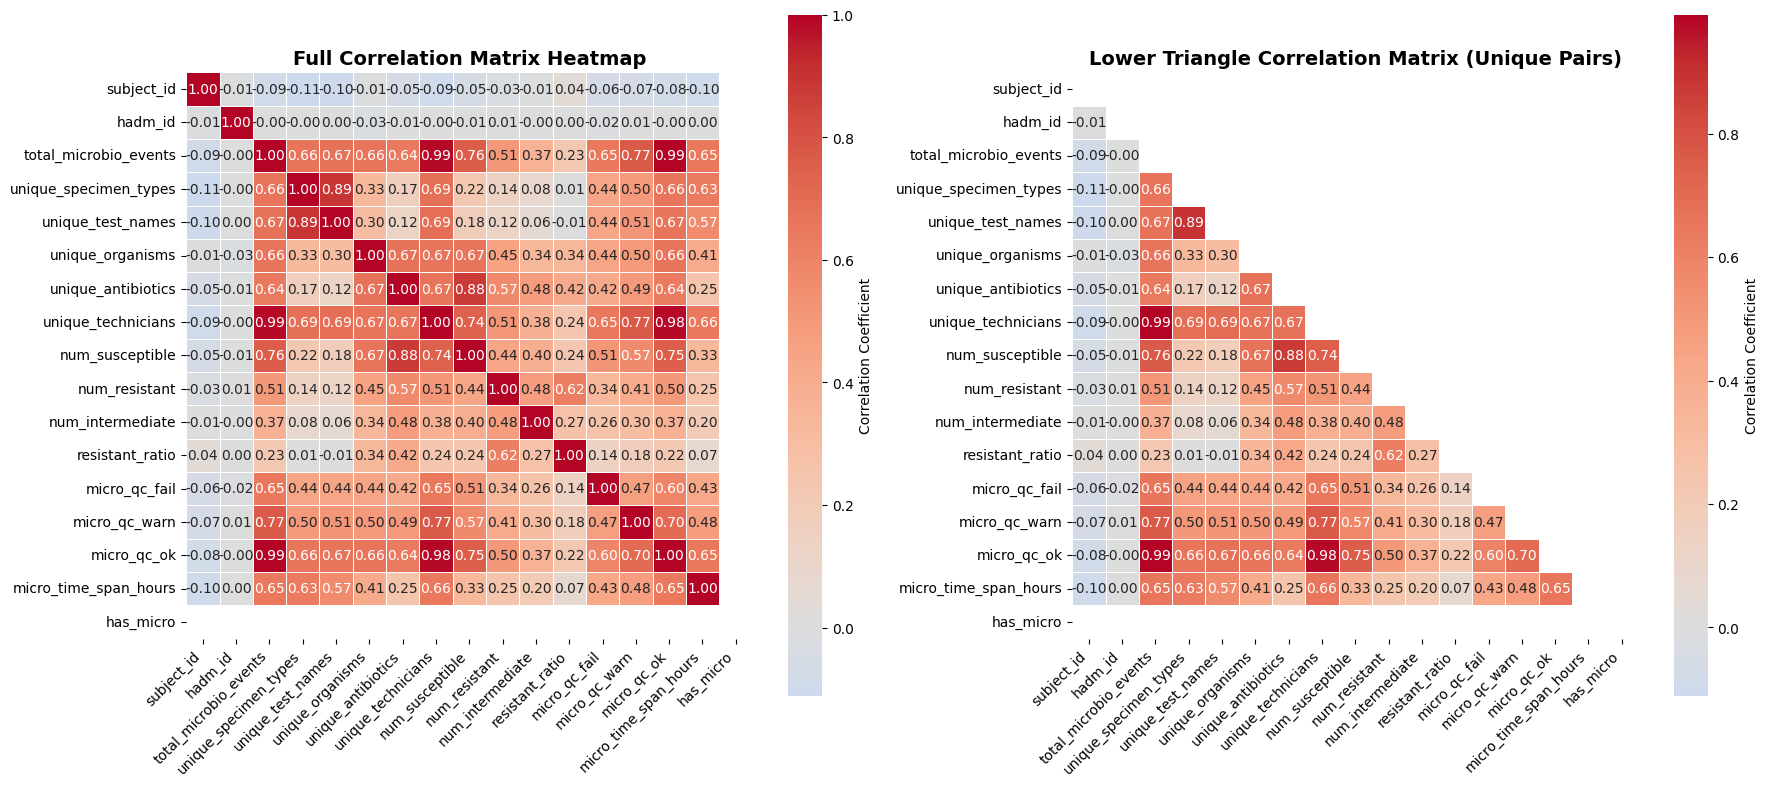


STRONG CORRELATIONS (|r| > 0.5, excluding self-correlations)

Found 42 strong correlations:

           Variable 1            Variable 2  Correlation        Strength
total_microbio_events           micro_qc_ok     0.993120 Strong Positive
total_microbio_events    unique_technicians     0.990860 Strong Positive
   unique_technicians           micro_qc_ok     0.982787 Strong Positive
unique_specimen_types     unique_test_names     0.890931 Strong Positive
   unique_antibiotics       num_susceptible     0.875749 Strong Positive
total_microbio_events         micro_qc_warn     0.766980 Strong Positive
   unique_technicians         micro_qc_warn     0.765602 Strong Positive
total_microbio_events       num_susceptible     0.760190 Strong Positive
      num_susceptible           micro_qc_ok     0.754477 Strong Positive
   unique_technicians       num_susceptible     0.744262 Strong Positive
        micro_qc_warn           micro_qc_ok     0.701914 Strong Positive
    unique_test_names    uniqu

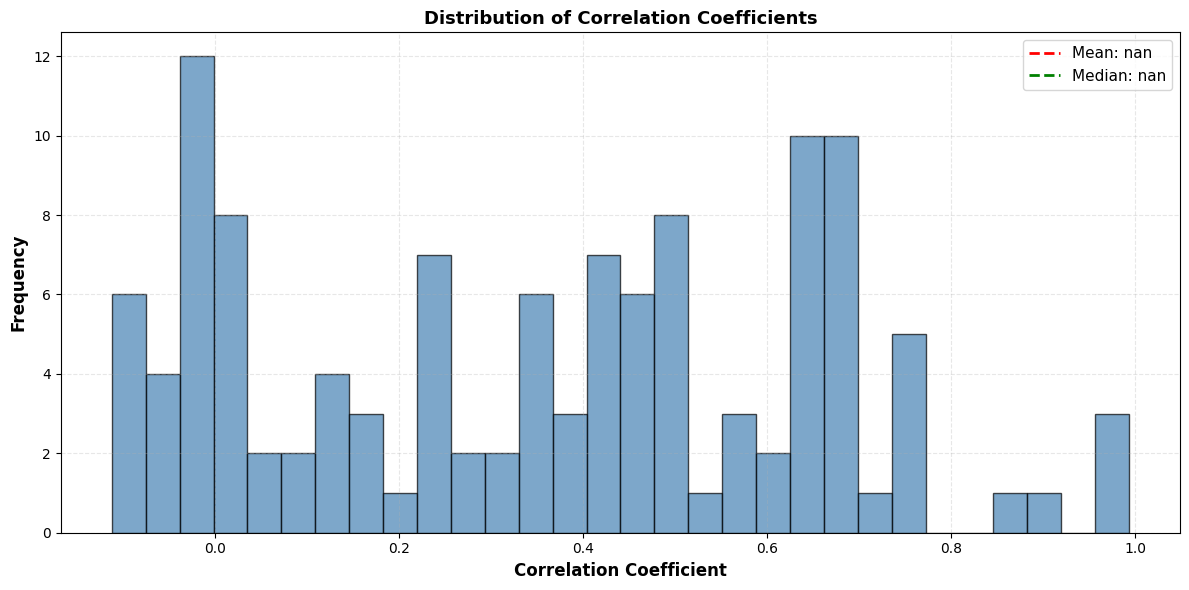

In [84]:
print("="*80)
print("CORRELATION MATRIX ANALYSIS")
print("="*80)

# Select numeric columns only
numeric_cols = micro_features.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns found: {numeric_cols}")
print(f"Total numeric columns: {len(numeric_cols)}\n")

if len(numeric_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = micro_features[numeric_cols].corr()
    
    print("="*80)
    print("CORRELATION MATRIX")
    print("="*80)
    print(correlation_matrix.round(3))
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot 1: Full correlation heatmap
    ax1 = axes[0]
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'label': 'Correlation Coefficient'},
                ax=ax1)
    ax1.set_title('Full Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax1.get_yticklabels(), rotation=0)
    
    # Plot 2: Mask for upper triangle (cleaner view)
    ax2 = axes[1]
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                mask=mask,
                cbar_kws={'label': 'Correlation Coefficient'},
                ax=ax2)
    ax2.set_title('Lower Triangle Correlation Matrix (Unique Pairs)', fontsize=14, fontweight='bold')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Extract strong correlations (> 0.5 or < -0.5, excluding diagonal)
    print("\n" + "="*80)
    print("STRONG CORRELATIONS (|r| > 0.5, excluding self-correlations)")
    print("="*80)
    
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
        print(f"\nFound {len(strong_corr)} strong correlations:\n")
        print(strong_corr_df.to_string(index=False))
    else:
        print("\nNo correlations with |r| > 0.5 found")
    
    # Moderate correlations (0.3 to 0.5)
    print("\n" + "="*80)
    print("MODERATE CORRELATIONS (0.3 < |r| ≤ 0.5)")
    print("="*80)
    
    moderate_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if 0.3 < abs(corr_value) <= 0.5:
                moderate_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Moderate Positive' if corr_value > 0 else 'Moderate Negative'
                })
    
    if moderate_corr:
        moderate_corr_df = pd.DataFrame(moderate_corr).sort_values('Correlation', key=abs, ascending=False)
        print(f"\nFound {len(moderate_corr)} moderate correlations:\n")
        print(moderate_corr_df.to_string(index=False))
    else:
        print("\nNo moderate correlations found (0.3 < |r| ≤ 0.5)")
    
    # Summary statistics
    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    
    # Get correlation values (excluding diagonal)
    corr_values = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_values.append(correlation_matrix.iloc[i, j])
    
    corr_values = np.array(corr_values)
    print(f"\nMean correlation: {corr_values.mean():.3f}")
    print(f"Median correlation: {np.median(corr_values):.3f}")
    print(f"Std Dev: {corr_values.std():.3f}")
    print(f"Min: {corr_values.min():.3f}")
    print(f"Max: {corr_values.max():.3f}")
    
    # Distribution of correlations
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(corr_values, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(corr_values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {corr_values.mean():.3f}')
    ax.axvline(np.median(corr_values), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(corr_values):.3f}')
    ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title('Distribution of Correlation Coefficients', fontsize=13, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig('correlation_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
else:
    print("⚠️ Not enough numeric columns for correlation analysis")
    print(f"Found only {len(numeric_cols)} numeric column(s)")

### Dropunused

In [90]:
micro_features.columns

Index(['subject_id', 'hadm_id', 'total_microbio_events',
       'unique_specimen_types', 'unique_test_names', 'unique_organisms',
       'unique_antibiotics', 'unique_technicians', 'num_susceptible',
       'num_resistant', 'num_intermediate', 'resistant_ratio', 'micro_qc_fail',
       'micro_qc_warn', 'micro_qc_ok', 'micro_time_span_hours', 'has_micro'],
      dtype='object')

In [101]:
micro_features_small6 = [
    'total_microbio_events',   # overall microbiology activity (dominant signal)
    'unique_specimen_types',   # sampling diversity
    'unique_organisms',        # biological diversity
    'resistant_ratio',         # susceptibility profile summary
   # 'unique_antibiotics',      # captures treatment relevance independent of organisms
   # 'unique_test_names'        # captures test diversity (operational dimension)
]
features_to_keep = [col for col in micro_features_small6 if col in micro_features.columns]
feat_reduced = micro_features[features_to_keep]

### Corr

CORRELATION MATRIX ANALYSIS

Numeric columns found: ['total_microbio_events', 'unique_specimen_types', 'unique_organisms', 'resistant_ratio']
Total numeric columns: 4

CORRELATION MATRIX
                       total_microbio_events  unique_specimen_types  \
total_microbio_events                  1.000                  0.665   
unique_specimen_types                  0.665                  1.000   
unique_organisms                       0.665                  0.331   
resistant_ratio                        0.227                  0.008   

                       unique_organisms  resistant_ratio  
total_microbio_events             0.665            0.227  
unique_specimen_types             0.331            0.008  
unique_organisms                  1.000            0.342  
resistant_ratio                   0.342            1.000  


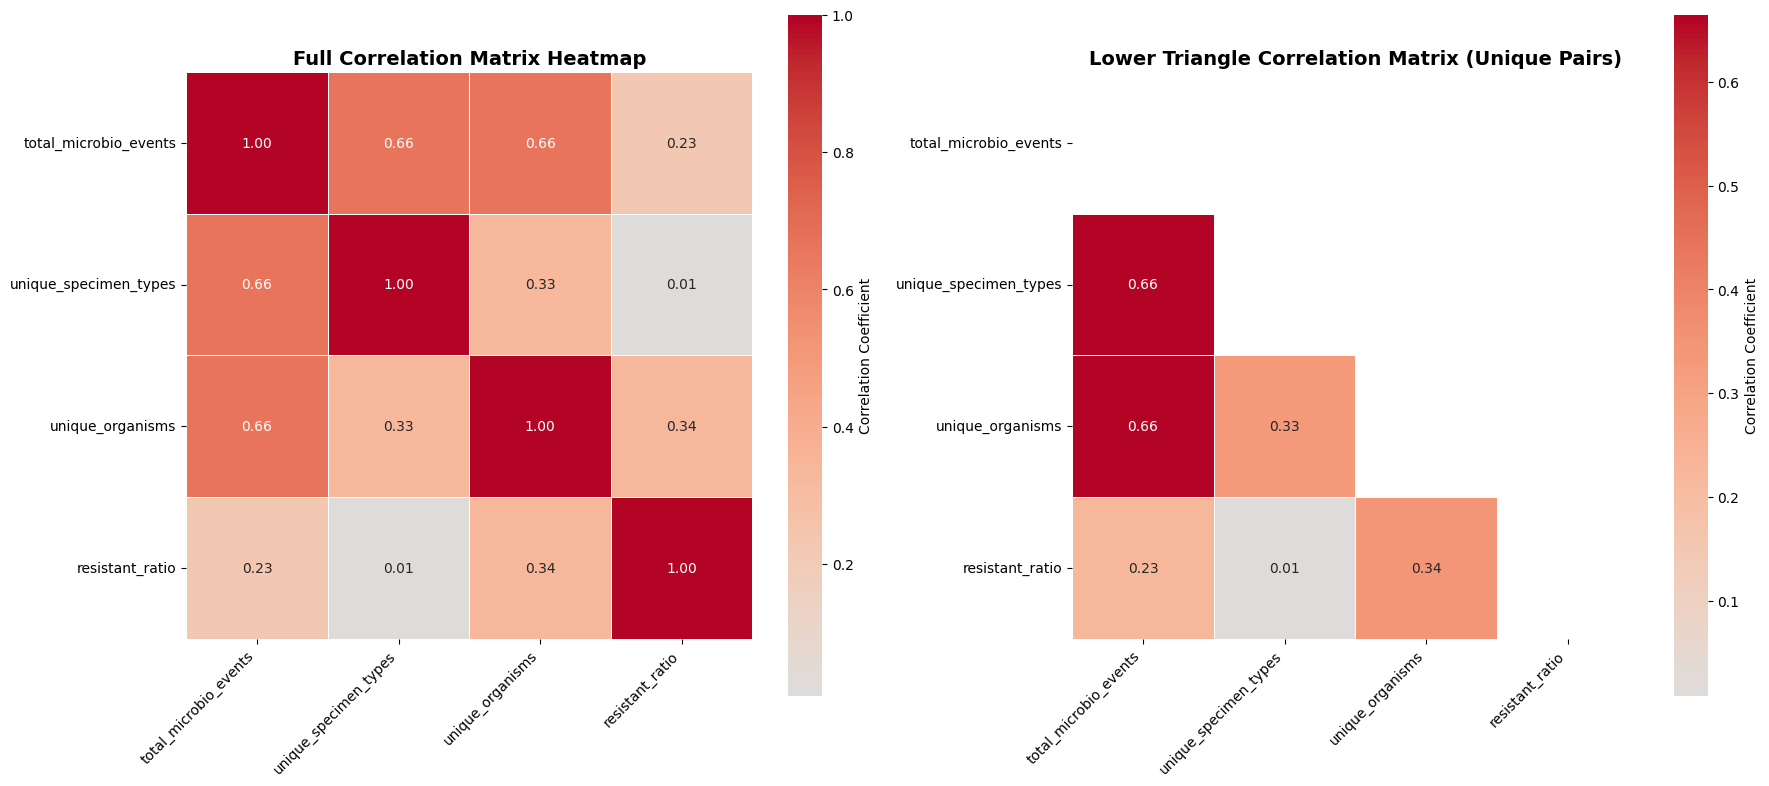


STRONG CORRELATIONS (|r| > 0.5, excluding self-correlations)

Found 2 strong correlations:

           Variable 1            Variable 2  Correlation        Strength
total_microbio_events      unique_organisms     0.664818 Strong Positive
total_microbio_events unique_specimen_types     0.664577 Strong Positive

MODERATE CORRELATIONS (0.3 < |r| ≤ 0.5)

Found 2 moderate correlations:

           Variable 1       Variable 2  Correlation          Strength
     unique_organisms  resistant_ratio     0.342308 Moderate Positive
unique_specimen_types unique_organisms     0.330739 Moderate Positive

SUMMARY STATISTICS

Mean correlation: 0.373
Median correlation: 0.337
Std Dev: 0.234
Min: 0.008
Max: 0.665


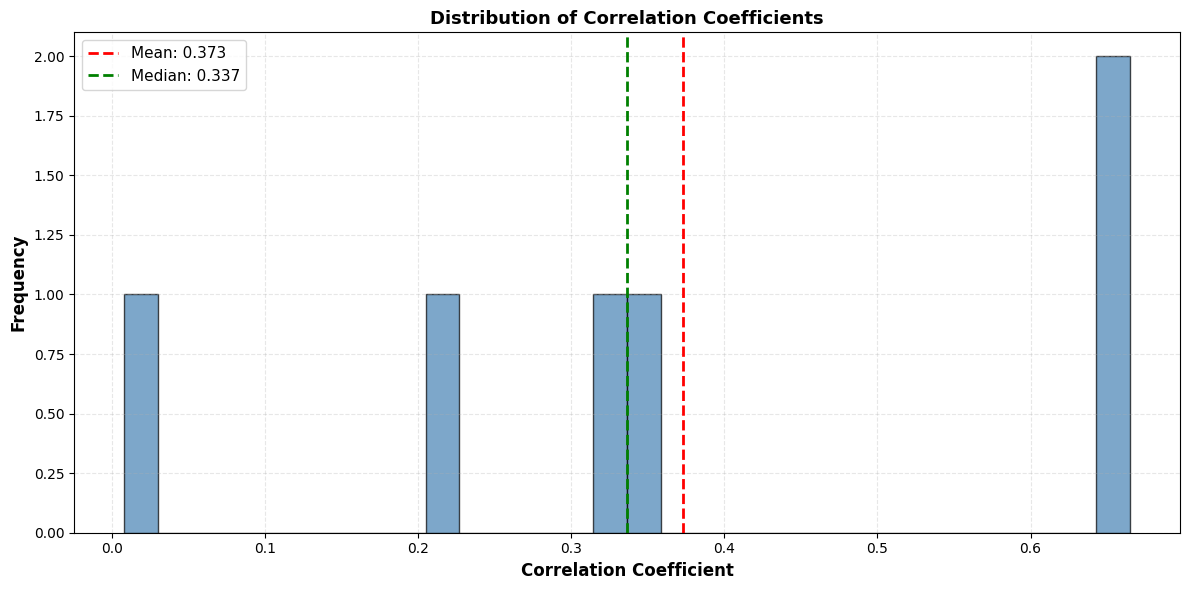

In [102]:
print("="*80)
print("CORRELATION MATRIX ANALYSIS")
print("="*80)

# Select numeric columns only
numeric_cols = feat_reduced.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns found: {numeric_cols}")
print(f"Total numeric columns: {len(numeric_cols)}\n")  

if len(numeric_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = feat_reduced[numeric_cols].corr()
    
    print("="*80)
    print("CORRELATION MATRIX")
    print("="*80)
    print(correlation_matrix.round(3))
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot 1: Full correlation heatmap
    ax1 = axes[0]
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'label': 'Correlation Coefficient'},
                ax=ax1)
    ax1.set_title('Full Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax1.get_yticklabels(), rotation=0)
    
    # Plot 2: Mask for upper triangle (cleaner view)
    ax2 = axes[1]
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                linewidths=0.5,
                mask=mask,
                cbar_kws={'label': 'Correlation Coefficient'},
                ax=ax2)
    ax2.set_title('Lower Triangle Correlation Matrix (Unique Pairs)', fontsize=14, fontweight='bold')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Extract strong correlations (> 0.5 or < -0.5, excluding diagonal)
    print("\n" + "="*80)
    print("STRONG CORRELATIONS (|r| > 0.5, excluding self-correlations)")
    print("="*80)
    
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Strong Positive' if corr_value > 0 else 'Strong Negative'
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
        print(f"\nFound {len(strong_corr)} strong correlations:\n")
        print(strong_corr_df.to_string(index=False))
    else:
        print("\nNo correlations with |r| > 0.5 found")
    
    # Moderate correlations (0.3 to 0.5)
    print("\n" + "="*80)
    print("MODERATE CORRELATIONS (0.3 < |r| ≤ 0.5)")
    print("="*80)
    
    moderate_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if 0.3 < abs(corr_value) <= 0.5:
                moderate_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Moderate Positive' if corr_value > 0 else 'Moderate Negative'
                })
    
    if moderate_corr:
        moderate_corr_df = pd.DataFrame(moderate_corr).sort_values('Correlation', key=abs, ascending=False)
        print(f"\nFound {len(moderate_corr)} moderate correlations:\n")
        print(moderate_corr_df.to_string(index=False))
    else:
        print("\nNo moderate correlations found (0.3 < |r| ≤ 0.5)")
    
    # Summary statistics
    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    
    # Get correlation values (excluding diagonal)
    corr_values = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_values.append(correlation_matrix.iloc[i, j])
    
    corr_values = np.array(corr_values)
    print(f"\nMean correlation: {corr_values.mean():.3f}")
    print(f"Median correlation: {np.median(corr_values):.3f}")
    print(f"Std Dev: {corr_values.std():.3f}")
    print(f"Min: {corr_values.min():.3f}")
    print(f"Max: {corr_values.max():.3f}")
    
    # Distribution of correlations
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(corr_values, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(corr_values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {corr_values.mean():.3f}')
    ax.axvline(np.median(corr_values), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(corr_values):.3f}')
    ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title('Distribution of Correlation Coefficients', fontsize=13, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig('correlation_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
else:
    print("⚠️ Not enough numeric columns for correlation analysis")
    print(f"Found only {len(numeric_cols)} numeric column(s)")

## Save SLim

In [103]:
feat_reduced.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_agg_features.csv')}", index=False)